In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# UNIFORM RANDOM DISTRIBUTION OF POINTS ON UNIT SPHERE.
def random_spin():
    x = np.random.normal(0, 1, 3)
    x = x/np.sqrt(x@x)
    
    return x

# RETURN THE VALUE OF SPIN MAGNITUDE.
def spin(site):
    i_ = site[0]%n
    j_ = site[1]%n
    s = spin_config[i_][j_]
    if (len(s) == 3):
        spin_val = 1
    elif (len(s) == 2):
        spin_val = 0
        
    return spin_val

# INITIALIZE ENERGY OF THE SYSTEM.
def initialize_energy():
    Energy = 0
    for i in range(n):
        for j in range(n):
            Energy += (J1/4)*(dot(spin_config[i][j], spin_config[(i+1)%n][j]) + dot(spin_config[i][j],spin_config[i][(j+1)%n]))
            Energy += (J2/4)*(dot(spin_config[i][j], spin_config[(i+1)%n][(j+1)%n]) + dot(spin_config[i][j], spin_config[(i+1)%n][(j-1)%n]))
        
    return Energy

# Calculate E
def calc_energy(spins):
    en = 0
    for i in range(n):
        for j in range(n):
            en += (J1/4)*(dot(spins[i][j], spins[(i+1)%n][j]) + dot(spins[i][j],spins[i][(j+1)%n]))
            en += (J2/4)*(dot(spins[i][j], spins[(i+1)%n][(j+1)%n]) + dot(spins[i][j], spins[(i+1)%n][(j-1)%n]))
        
    return en

In [3]:
# DOT PRODUCT DEFINITION

def dot(v1, v2):
    if (len(v1) == 3 and len(v2) == 3):
        dot_prod = v1@v2
    else:
        dot_prod = 0
        
    return dot_prod

# DISTANCES ON A TORUS

def dist(site1, site2):
    ix = site1[0]
    iy = site1[1]
    jx = site2[0]
    jy = site2[1]
    
    rx = abs(ix - jx)
    if (rx >= n/2):
        distancex = n - rx
    else:
        distancex = rx
        
    ry = abs(iy - jy)
    if (ry >= n/2):
        distancey = n - ry
    else:
        distancey = ry
    
    if (distancex == 0 or distancey == 0):
        distance = 1
        
    elif (distancex == 1 and distancey == 1):
        distance = 2
    
    else:
        print("Error?")
    
    return distance

In [4]:
def make_dimer(site):
#     print("Make")
    global E
    global spin_config

    ix = site[0]
    iy = site[1]
    
    unpaired_list = []
    for nbr in [[ix+1, iy], [ix-1, iy], [ix, iy+1], [ix, iy-1], [ix-1, iy-1], [ix-1, iy+1], [ix+1, iy-1], [ix+1, iy+1]]:
        if (spin(nbr) == 1):
            unpaired_list.append(nbr)
    
    if(len(unpaired_list)==0):
        return
    
    else:
        unpaired_indices = np.random.choice(len(unpaired_list))
        unpaired_data = unpaired_list[unpaired_indices]
        
        jx = unpaired_data[0]%n
        jy = unpaired_data[1]%n
        
        if (dist([ix, iy], [jx, jy]) == 1):
            J = J1
        elif(dist([ix, iy], [jx, jy]) == 2):
            J = J2
            
        spin_config_new = np.copy(spin_config)
        
        spin_config_new[ix][iy] = [jx, jy]
        spin_config_new[jx][jy] = [ix, iy]
        
        E_old = calc_energy(spin_config)
        E_new = calc_energy(spin_config_new)
        
        dE = E_new -(3*J)/4 - E_old

        # Metropolis implementation.

        p_accept = min(1, np.exp(-beta*dE))
        if (np.random.random() <= p_accept):
#             print(dE)
            spin_config[ix][iy] = [jx, jy]
            spin_config[jx][jy] = [ix, iy]
            E += dE

In [5]:
# def make_dimer(site):
#     global E
#     global spin_config

#     ix = site[0]
#     iy = site[1]
    
#     unpaired_list = []
#     for nbr in [[ix+1, iy], [ix-1, iy], [ix, iy+1], [ix, iy-1], [ix-1, iy-1], [ix-1, iy+1], [ix+1, iy-1], [ix+1, iy+1]]:
#         if (spin(nbr) == 1):
#             unpaired_list.append(nbr)
    
#     if(len(unpaired_list)==0):
#         return
    
#     else:
#         unpaired_indices = np.random.choice(len(unpaired_list))
#         unpaired_data = unpaired_list[unpaired_indices]
        
#         jx = unpaired_data[0]%n
#         jy = unpaired_data[1]%n

#         if (dist([ix, iy], [jx, jy]) == 1):
#             J = J1
#         elif(dist([ix, iy], [jx, jy]) == 2):
#             J = J2

#         # Calculate the change in energy if dimer is formed.
#         E_1 = -(3*J)/4
#         E_2 = - (J1/4)*(dot(spin_config[ix][iy], spin_config[(ix-1)%n][iy]) + dot(spin_config[ix][iy], spin_config[(ix+1)%n][iy]) + dot(spin_config[ix][iy], spin_config[ix][(iy-1)%n]) + dot(spin_config[ix][iy], spin_config[ix][(iy+1)%n]) + dot(spin_config[jx][jy], spin_config[(jx-1)%n][jy]) + dot(spin_config[jx][jy], spin_config[(jx+1)%n][jy]) + dot(spin_config[jx][jy], spin_config[jx][(jy+1)%n]) + dot(spin_config[jx][jy], spin_config[jx][(jy-1)%n]))
#         E_3 = - (J2/4)*(dot(spin_config[ix][iy], spin_config[(ix-1)%n][(iy-1)%n]) + dot(spin_config[ix][iy], spin_config[(ix+1)%n][(iy-1)%n]) + dot(spin_config[ix][iy], spin_config[(ix-1)%n][(iy+1)%n]) + dot(spin_config[ix][iy], spin_config[(ix+1)%n][(iy+1)%n]) + dot(spin_config[jx][jy], spin_config[(jx-1)%n][(jy-1)%n]) + dot(spin_config[jx][jy], spin_config[(jx+1)%n][(jy-1)%n]) + dot(spin_config[jx][jy], spin_config[(jx-1)%n][(jy+1)%n]) + dot(spin_config[jx][jy], spin_config[(jx+1)%n][(jy+1)%n]))
#         #         E_3 = - (J2/4)*(dot(spin_config[ix], spin_config[(ix - 2)%n]) + dot(spin_config[ix], spin_config[(ix + 2)%n]) + dot(spin_config[jx], spin_config[(jx - 2)%n]) + dot(spin_config[jx], spin_config[(jx + 2)%n]))
#         E_4 = (J/4)*(dot(spin_config[ix][iy], spin_config[jx][jy]))

#         dE = E_1 + E_2 + E_3 + E_4

#         # Metropolis implementation.

#         p_accept = min(1, np.exp(-beta*dE))
#         if (np.random.random() <= p_accept):
#             spin_config[ix][iy] = [jx, jy]
#             spin_config[jx][jy] = [ix, iy]
#             E += dE

In [6]:
def spin_rotation(site):
#     print("Rotate")
    global E
    global spin_config

    ix = site[0]
    iy = site[1]
    
    spin_config_new = np.copy(spin_config)
        
    spin_config_new[ix][iy] = random_spin()
    
    E_old = calc_energy(spin_config)
    E_new = calc_energy(spin_config_new)

    dE = E_new - E_old    
    
    # Metropolis implementation.
    p_accept = min(1, np.exp(-beta*dE))
    
    if (np.random.random() <= p_accept):
#         print(dE)
        spin_config[ix][iy] = spin_config_new[ix][iy]
        E += dE

In [7]:
def break_dimer(site):
#     print("Break")
    global E
    global spin_config

    ix = site[0]
    iy = site[1]
    
    jx = spin_config[ix][iy][0]
    jy = spin_config[ix][iy][1]
    
    if (dist([ix, iy], [jx, jy]) == 1):
        J = J1
    elif(dist([ix, iy], [jx, jy]) == 2):
        J = J2
         
    spin_config_new = np.copy(spin_config)

    # Modifying a copy of the spin configutation.
    
    spin_config_new[ix][iy] = random_spin()
    spin_config_new[jx][jy] = random_spin()
    
    E_old = calc_energy(spin_config)
    E_new = calc_energy(spin_config_new)
    
    dE = E_new - E_old + (3*J)/4

    # Metropolis implementation.
    
    p_accept = min(1, np.exp(-beta*dE))
    if (np.random.random() <= p_accept):
#         print(dE)
        spin_config[ix][iy] = spin_config_new[ix][iy]
        spin_config[jx][jy] = spin_config_new[jx][jy]
        E += dE

In [8]:
# def break_dimer(site):
#     global E
#     global spin_config

#     ix = site[0]
#     iy = site[1]
    
#     jx = spin_config[ix][iy][0]
#     jy = spin_config[ix][iy][1]
    
#     if (dist([ix, iy], [jx, jy]) == 1):
#         J = J1
#     elif(dist([ix, iy], [jx, jy]) == 2):
#         J = J2
     
#     spin_config_new = np.copy(spin_config)

#     # Modifying a copy of the spin configutation.
    
#     spin_config_new[ix][iy] = random_spin()
#     spin_config_new[jx][jy] = random_spin()
    
#     # Calculate the change in energy if dimer is broken.
#     E_1 = + (3*J)/4
#     E_2 = + (J1/4)*(dot(spin_config_new[ix][iy], spin_config_new[(ix-1)%n][iy]) + dot(spin_config_new[ix][iy], spin_config_new[(ix+1)%n][iy]) + dot(spin_config_new[ix][iy], spin_config_new[ix][(iy-1)%n]) + dot(spin_config_new[ix][iy], spin_config_new[ix][(iy+1)%n]) + dot(spin_config_new[jx][jy], spin_config_new[(jx-1)%n][jy]) + dot(spin_config_new[jx][jy], spin_config_new[(jx+1)%n][jy]) + dot(spin_config_new[jx][jy], spin_config_new[jx][(jy+1)%n]) + dot(spin_config_new[jx][jy], spin_config_new[jx][(jy-1)%n]))
#     E_3 = + (J2/4)*(dot(spin_config_new[ix][iy], spin_config_new[(ix-1)%n][(iy-1)%n]) + dot(spin_config_new[ix][iy], spin_config_new[(ix+1)%n][(iy-1)%n]) + dot(spin_config_new[ix][iy], spin_config_new[(ix-1)%n][(iy+1)%n]) + dot(spin_config_new[ix][iy], spin_config_new[(ix+1)%n][(iy+1)%n]) + dot(spin_config_new[jx][jy], spin_config_new[(jx-1)%n][(jy-1)%n]) + dot(spin_config_new[jx][jy], spin_config_new[(jx+1)%n][(jy-1)%n]) + dot(spin_config_new[jx][jy], spin_config_new[(jx-1)%n][(jy+1)%n]) + dot(spin_config_new[jx][jy], spin_config_new[(jx+1)%n][(jy+1)%n]))
#     E_4 = - (J/4)*(dot(spin_config_new[ix][iy], spin_config_new[jx][jy]))

#     dE = E_1 + E_2 + E_3 + E_4
    
#     # Metropolis implementation.
    
#     p_accept = min(1, np.exp(-beta*dE))
#     if (np.random.random() <= p_accept):
#         spin_config[ix][iy] = spin_config_new[ix][iy]
#         spin_config[jx][jy] = spin_config_new[jx][jy]
#         E += dE

In [9]:
# MONTE CARLO SWEEP (RANDOM)

def monte_carlo_sweep():
    
    for i in range(n*n):
        
        ix = int(np.random.random()*n)
        iy = int(np.random.random()*n)
        
        site = [ix, iy]
        
        # f tunes the ratio of random spin rotations to dimer formation. Increase f to increase dimer formation.
        f = 0.5

        # If the chosen site has a free spin.
        if (spin(site) == 1):
            if (f <= np.random.random()):
                spin_rotation(site)
            else:
                make_dimer(site)

        # If the chosen site is part of a dimer.        
        elif (spin(site) == 0):
            break_dimer(site)

    # One MC Sweep Over.
            
    free_spins = []
    
    for i in range(n):
        for j in range(n):
            if (spin([i, j]) == 1):
                free_spins.append([i, j])
    
    if(len(free_spins)==0):
        iene = E/(n*n)
        stot = np.zeros((3), dtype=np.float64)
    
        return iene, stot
    
    else:
        S = np.zeros((3), dtype=np.float64)
        
        for sites in free_spins:
            S += np.array(spin_config[sites[0]][sites[1]])*((-1)**(sites[0]+sites[1]))

    iene = E/(n*n)
    stot = S/(n*n)
    
    return iene, stot

In [143]:
# DEFINE THE LATTICE.
n = 10
beta = 10
J1 = 4
J2 = 1.5

global spin_config
spin_config = np.zeros((n, n), dtype=np.ndarray)

for i in range(n):
    for j in range(n):
        spin_config[i][j] = random_spin()
#         spin_config[i][j] = np.array([0.57735027, 0.57735027, 0.57735027])*((-1)**(i+j))
    
global E 
E = initialize_energy()

# print(spin_config, E)

nsweeps = int(1.0e3)

E_list = []
S_list = []

for i in range(nsweeps):
        E_meas, S_meas = monte_carlo_sweep()
        
        E_list.append(E_meas)
        S_list.append(S_meas)
        
        if(i%100 == 0):
            print(i)

count_dimer = 0
for i in range(n):
    for j in range(n):
        if (len(spin_config[i][j]) == 2):
            count_dimer +=1
        
print(spin_config)
print(count_dimer)

0
100
200
300
400
500
600
700
800
900
[[list([9, 0]) list([0, 2]) list([0, 1]) list([0, 4]) list([0, 3])
  list([9, 5]) list([1, 6]) list([9, 7]) list([0, 9]) list([0, 8])]
 [list([1, 1]) list([1, 0])
  array([-0.95355459,  0.28590139,  0.09483692]) list([1, 4])
  list([1, 3]) list([2, 5]) list([0, 6]) list([1, 8]) list([1, 7])
  list([2, 9])]
 [array([ 0.65224402,  0.17269135, -0.7380755 ]) list([3, 1])
  list([3, 2]) list([2, 4]) list([2, 3]) list([1, 5]) list([2, 7])
  list([2, 6]) list([3, 8]) list([1, 9])]
 [list([3, 9]) list([2, 1]) list([2, 2]) list([4, 3]) list([3, 5])
  list([3, 4]) list([3, 7]) list([3, 6]) list([2, 8]) list([3, 0])]
 [list([4, 1]) list([4, 0]) list([5, 1]) list([3, 3]) list([5, 4])
  array([ 0.64383531, -0.76445981, -0.03282222]) list([5, 6])
  list([5, 7]) list([4, 9]) list([4, 8])]
 [list([6, 0]) list([4, 2]) list([6, 2]) list([6, 4]) list([4, 4])
  list([6, 5]) list([4, 6]) list([4, 7]) list([6, 7]) list([6, 9])]
 [list([5, 0]) list([7, 1]) list([5, 2]) l

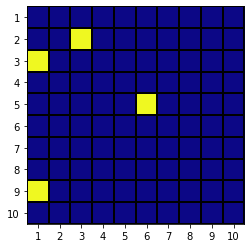

In [144]:
spin_state = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if (len(spin_config[i][j]) == 3):
            spin_state[i][j] = 1

spin_state
plt.imshow(np.array(spin_state) , cmap = 'plasma' , interpolation = 'nearest', vmin = 0, vmax = 1)
# plt.pcolormesh(np.array(spin_state), edgecolors='k', linewidth=2)
ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, 10, 1))
ax.set_yticks(np.arange(0, 10, 1))

# Labels for major ticks
ax.set_xticklabels(np.arange(1, 11, 1))
ax.set_yticklabels(np.arange(1, 11, 1))

# Minor ticks
ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
ax.set_yticks(np.arange(-.5, 10, 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='k', linestyle='-', linewidth=2)

# Remove minor ticks
ax.tick_params(which='minor', bottom=False, left=False)
plt.show()

In [145]:
# Blue = Dimer
# Yellow = Free Spins

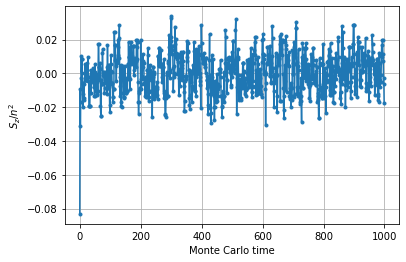

In [146]:
plt.plot(np.array(S_list).T[2], '.-')
plt.xlabel("Monte Carlo time")
plt.ylabel(r'$S_z/n^2$')
# plt.ylim([-1,1])
plt.grid(True)
plt.show()

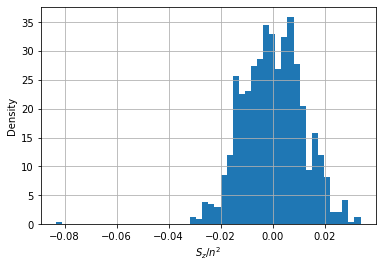

In [147]:
plt.hist(np.array(S_list).T[2], density = True, bins = 50)
plt.xlabel(r'$S_z/n^2$')
plt.ylabel("Density")
plt.grid(True)
plt.show()

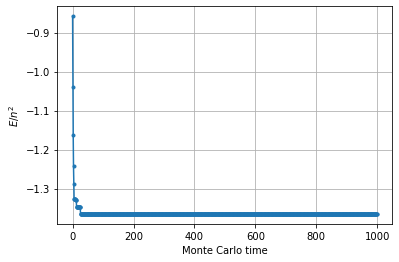

In [148]:
plt.plot(E_list, '.-')
plt.xlabel("Monte Carlo time")
plt.ylabel(r'$E/n^2$')
plt.grid(True)
plt.show()

In [15]:
# DEFINE THE LATTICE.
n = 10
beta = 50
J1 = 4
J2 = 0.1

global spin_config
spin_config = np.zeros((n, n), dtype=np.ndarray)

for i in range(n):
    for j in range(n):
#         spin_config[i][j] = random_spin()
        spin_config[i][j] = np.array([0.57735027, 0.57735027, 0.57735027])*((-1)**(i+j))
    
global E 
E = calc_energy(spin_config)

# print(spin_config, E)

nsweeps = int(1.0e3)

E_list = []
S_list = []

for i in range(nsweeps):
        E_meas, S_meas = monte_carlo_sweep()
        
        E_list.append(E_meas)
        S_list.append(S_meas)
        
        if(i%100 == 0):
            print(i)

count_dimer = 0
for i in range(n):
    for j in range(n):
        if (len(spin_config[i][j]) == 2):
            count_dimer +=1
        
print(spin_config)
print(count_dimer)

0
100
200
300
400
500
600
700
800
900
[[array([0.61733933, 0.60219526, 0.5062144 ])
  array([-0.63062321, -0.54328035, -0.55422092])
  array([0.70804894, 0.44673709, 0.54689365])
  array([-0.57735027, -0.57735027, -0.57735027])
  array([0.4932324 , 0.71435439, 0.4964067 ])
  array([-0.44051308, -0.72356567, -0.5314141 ])
  array([0.57339583, 0.65151864, 0.49672998])
  array([-0.57500902, -0.70706444, -0.41161208])
  array([0.66405922, 0.62792673, 0.40587359])
  array([-0.57735027, -0.57735027, -0.57735027])]
 [array([-0.541966  , -0.53430318, -0.64868557])
  array([0.59302074, 0.52743755, 0.60838807])
  array([-0.57735027, -0.57735027, -0.57735027])
  array([0.57735027, 0.57735027, 0.57735027])
  array([-0.5520862 , -0.62863579, -0.54773887])
  array([0.43549746, 0.6324446 , 0.64059019])
  array([-0.46821989, -0.65693965, -0.59093183])
  array([0.51630336, 0.73332124, 0.44234692])
  array([-0.53729226, -0.5347595 , -0.65218809])
  array([0.53393951, 0.56401487, 0.62991732])]
 [array([0

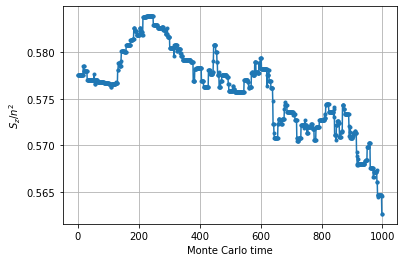

In [16]:
plt.plot(np.array(S_list).T[2], '.-')
plt.xlabel("Monte Carlo time")
plt.ylabel(r'$S_z/n^2$')
# plt.ylim([-1,1])
plt.grid(True)
plt.show()

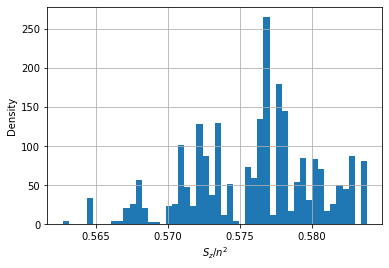

In [17]:
plt.hist(np.array(S_list).T[2], density = True, bins = 50)
plt.xlabel(r'$S_z/n^2$')
plt.ylabel("Density")
plt.grid(True)
plt.show()

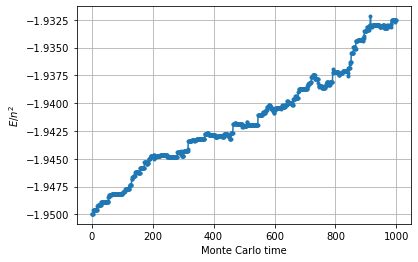

In [18]:
plt.plot(E_list, '.-')
plt.xlabel("Monte Carlo time")
plt.ylabel(r'$E/n^2$')
plt.grid(True)
plt.show()

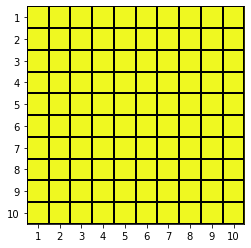

In [19]:
spin_state = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if (len(spin_config[i][j]) == 3):
            spin_state[i][j] = 1

spin_state
plt.imshow(np.array(spin_state) , cmap = 'plasma' , interpolation = 'nearest', vmin = 0, vmax = 1)
# plt.pcolormesh(np.array(spin_state), edgecolors='k', linewidth=2)
ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, 10, 1))
ax.set_yticks(np.arange(0, 10, 1))

# Labels for major ticks
ax.set_xticklabels(np.arange(1, 11, 1))
ax.set_yticklabels(np.arange(1, 11, 1))

# Minor ticks
ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
ax.set_yticks(np.arange(-.5, 10, 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='k', linestyle='-', linewidth=2)

# Remove minor ticks
ax.tick_params(which='minor', bottom=False, left=False)
plt.show()

In [139]:
# Idea. Make a hybrid of naive and non-naive energetic calculations. Modify each of the "Make", "Break", "Rotate" functions one by one.